In [1]:
import pandas as pd 
df = pd.read_csv('../csv/chifoumi-dataset.csv')

In [2]:
X = df.drop(['filename', 'target'], axis = 1)
y = df['target']

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
from sklearn.preprocessing import MinMaxScaler,FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector

In [5]:
model = SVC(kernel= 'poly', gamma = 1, coef0 = 0, C = 0.01, probability=True)
# X_train = (X_train - X_train.mean()) / X_train.std()
# rounder = FunctionTransformer(lambda array: np.round(array, decimals=2))
normalizer = FunctionTransformer(lambda df: df.apply(lambda row: (row - row.mean()) / row.std(), axis =1))
scaling = make_column_transformer((MinMaxScaler(), make_column_selector(dtype_include=['float64'])))
pipeline = make_pipeline(normalizer, scaling, model)
pipeline

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function <lambda> at 0x7fdc7cc515a0>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fdc7cc399c0>)])),
                ('svc',
                 SVC(C=0.01, coef0=0, gamma=1, kernel='poly',
                     probability=True))])

In [6]:
pipe = pipeline.fit(X_train, y_train)

In [7]:
pd.DataFrame(normalizer.fit_transform(X_train)).head()

,1x,1y,1z,2x,2y,2z,3x,3y,3z,4x,...,18z,19x,19y,19z,20x,20y,20z,21x,21y,21z
5449,0.663732,2.094158,-0.893808,-0.067954,1.886708,-1.040154,-0.317629,1.483016,-1.119056,-0.304296,...,-1.163938,1.215298,0.810144,-1.257525,1.155439,0.554333,-1.301138,1.112580,0.333508,-1.317802
5527,1.649375,0.767387,-1.311348,1.183517,1.569332,-1.317509,0.634111,1.832812,-1.336172,0.094087,...,-1.315603,0.475619,0.018600,-1.259475,0.604279,0.158944,-1.176775,0.757806,0.178351,-1.124727
6840,-0.746709,0.636730,-1.230881,-0.498027,1.394056,-1.216801,-0.084916,1.813958,-1.214233,0.354318,...,-1.287765,0.387147,0.246305,-1.240681,0.258961,0.283331,-1.164123,0.124353,0.273930,-1.114082
6574,-1.823620,1.513827,-2.906811,-1.183597,-0.471657,-1.931289,-0.194294,-1.156211,-1.134571,0.447176,...,-1.190609,0.641565,1.727761,-0.245218,0.205750,1.547650,-0.048430,-0.045006,1.635514,-0.098947
3942,-0.485768,0.272889,-1.073490,-0.239825,0.935872,-1.168395,0.193527,1.183231,-1.193364,0.601873,...,-1.132828,0.801410,-0.407140,-1.187086,1.052334,-0.375599,-1.221934,1.266208,-0.330678,-1.238730


In [8]:
y_pred = pipe.predict(X_test)

In [9]:
pd.DataFrame(normalizer.fit_transform(X_test)).head()

,1x,1y,1z,2x,2y,2z,3x,3y,3z,4x,...,18z,19x,19y,19z,20x,20y,20z,21x,21y,21z
5874,1.412387,0.554226,-1.409021,1.131883,1.320295,-1.353669,0.681403,1.673061,-1.341458,0.227338,...,-1.392626,0.286268,0.183947,-1.271419,0.410714,0.245934,-1.169885,0.537957,0.253316,-1.119036
6148,1.730293,0.930066,-1.419089,1.223704,1.616839,-1.344873,0.647264,1.862840,-1.318438,0.100083,...,-1.387588,0.508540,-0.125413,-1.262276,0.649211,0.011073,-1.153693,0.803629,0.088707,-1.096138
3625,-0.796927,0.950293,-0.933971,-0.630655,0.240004,-1.025944,-0.251706,-0.060335,-1.089270,0.125361,...,-1.207355,0.408259,1.493688,-1.300670,0.674049,1.445852,-1.338266,0.907426,1.397875,-1.351142
5373,0.897280,2.061402,-0.961944,0.112784,1.821841,-1.041318,-0.177834,1.386509,-1.085612,-0.191442,...,-1.249265,1.373416,0.641769,-1.319832,1.314383,0.380126,-1.330486,1.255593,0.171857,-1.322423
7995,-0.076002,2.039626,-1.083795,0.638409,1.730963,-1.068256,1.024249,1.275001,-1.069304,1.061496,...,-1.239883,-0.732798,1.113790,-1.184012,-0.650860,1.249583,-1.108791,-0.606178,1.370222,-1.057290


In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.998375964271214

In [11]:
pd.DataFrame(y_pred).value_counts()

1    831
2    823
0    809
dtype: int64

In [12]:
results = pd.DataFrame({"actual" : y_test,
                       "predicted" : y_pred})

confusion_matrix = pd.crosstab(index= results['actual'],
                              columns = results['predicted'])
confusion_matrix

predicted,0,1,2
actual,,,
0,808,2,0
1,0,828,0
2,1,1,823


In [13]:
import pickle
import dill

with open("pipe.pkl", "wb") as file:
    dill.dump(pipe, file)

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [15]:
probas = pd.DataFrame(pipe.predict_proba(X_test))
probas = probas[probas <= 0.834].dropna().rename(columns = {0:'pierre', 1:'feuille', 2:'ciseaux'})

probas_filename = list(df.filename.iloc[probas.index])

In [16]:
probas_filename

['../raw_data/scissors/0Ug54ifXRqqlZS2Z.png',
 '../raw_data/scissors/0657zSfiTYzP2jrl.png',
 '../raw_data/scissors/UDihI8vQDjvGJRjO.png',
 '../raw_data/scissors/TNOQ2IEy4C6LBSD1.png',
 '../raw_data/scissors/MpiOsioYVx1AJelO.png',
 '../raw_data/scissors/svWW1IeCIfKmCxvY.png',
 '../raw_data/scissors/syu2UUmhELg3nol9.png']

In [17]:
y_test.iloc[probas.index]

4043    1
6100    0
255     2
6619    0
2518    2
952     2
7298    0
Name: target, dtype: int64

In [18]:
l = []
for i in range(len(probas_filename)):
    l.append(y_pred[i])

In [19]:
i = 0
while i < len(l):
  
    if l[i] == 0:
        l[i] = 'Pierre'
  
    if l[i] == 1:
        l[i] = 'Feuille'
        
    if l[i] == 2:  
        l[i] = 'Ciseaux'
    i += 1

In [20]:
for index, row in probas.iterrows():
    row.max()

In [21]:
import math
list_row_max = []
for index, row in probas.iterrows():
    list_row_max.append(round(row.max(), 3))

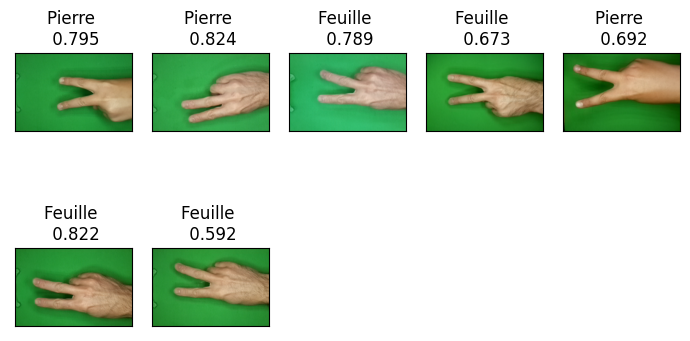

In [22]:
# Let's see some hands.
fig = plt.figure(figsize=(7,10))

for i in range(len(probas_filename)):
    plt.subplot(5, 5, i + 1)
    plt.title (f"{l[i]} \n {list_row_max[i]}")
    plt.imshow(mpimg.imread(probas_filename[i]))
    
    plt.xticks(())
    plt.yticks(())
    

plt.tight_layout()